In [23]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Fifa19.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [105]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [112]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [150]:
positionClasses = {
    'Goalkeeper': ['GK'],
    'Defender': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
    'Midfielder': ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 
                   'RCM', 'RM', 'LDM', 'CDM', 'RDM'],
    'Attacker': ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
}

def classifyPos(pos):
    for key in positionClasses:
        if pos in positionClasses[key]:
            return key

df['PositionClass'] = df['Position'].apply(classifyPos)
df[['Name','PositionClass']].head(10)

,Name,PositionClass
0,L. Messi,Attacker
1,Cristiano Ronaldo,Attacker
2,Neymar Jr,Attacker
3,De Gea,Goalkeeper
4,K. De Bruyne,Midfielder
5,E. Hazard,Attacker
6,L. Modrić,Midfielder
7,L. Suárez,Attacker
8,Sergio Ramos,Defender
9,J. Oblak,Goalkeeper


In [69]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

22-25    5574
26-30    5330
16-21    4543
31-35    2257
36-40     269
41-45       7
Name: Age_Ranges, dtype: int64

In [113]:
def convert(val):
    values = {'K': 1000, 'M': 1000000, '0':1}
    val = val.strip("€")
    if type(val) != float:
        unit = val[-1]
        val = pd.to_numeric(val[:-1]) * values[unit]
    return val.astype('float')

df['Value'] = df['Value'].apply(convert)
df['Wage'] = df['Wage'].apply(convert)


df[['Value', 'Wage']].head()

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0


In [114]:
topwage= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
topwage = topwage.set_index('Name')
topwage.head()

,Value,Wage
Name,,
L. Messi,110500000.0,565000.0
L. Suárez,80000000.0,455000.0
L. Modrić,67000000.0,420000.0
Cristiano Ronaldo,77000000.0,405000.0
Sergio Ramos,51000000.0,380000.0


Text(0, 0.5, 'Wage')

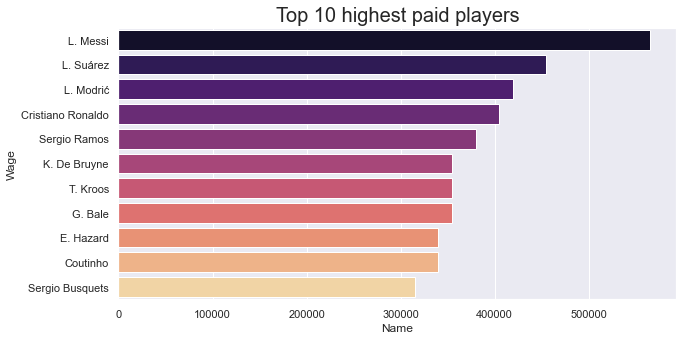

In [143]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = topwage['Wage'], y =topwage.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

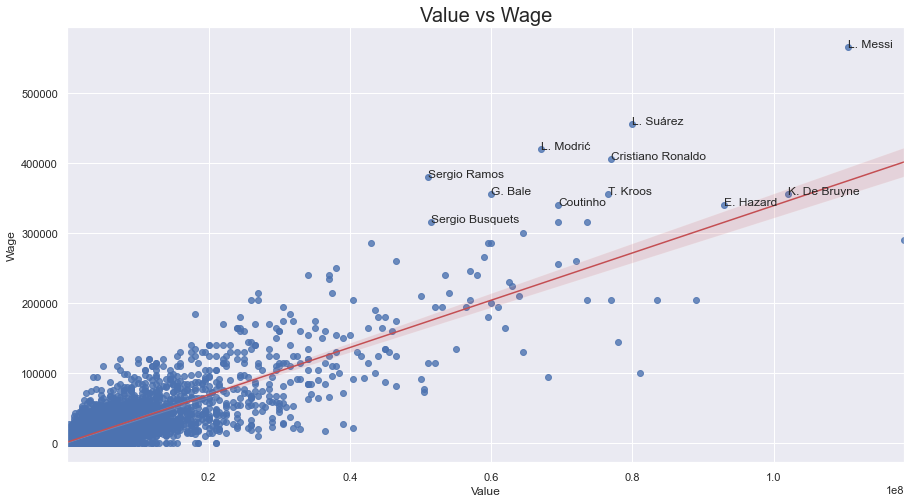

In [171]:
plt.figure(figsize=(15,8))
labels = topwage.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

# labeling the top 10 highest paid players
for i, label in enumerate(labels):
    ax.annotate(label, (topwage['Value'][i],topwage['Wage'][i]))

In [107]:
def best_positions(p_pos):
    ppos = list(p_pos.split(" "))
    print(ppos)

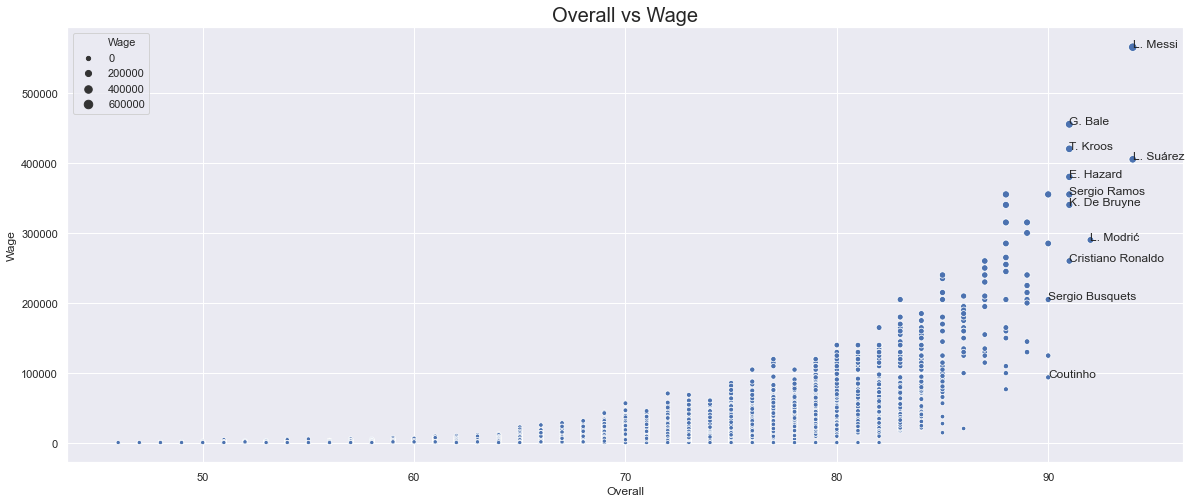

In [166]:
plt.figure(figsize=(20,8))
labels = topwage.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Top 5 nations with highest value of players')

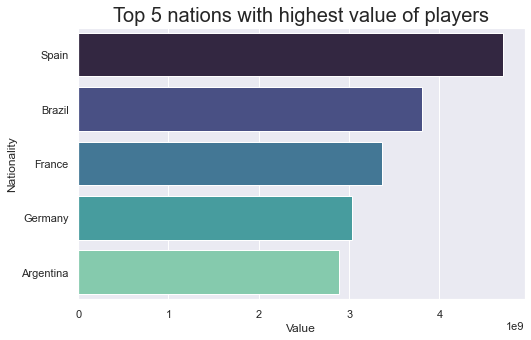

In [239]:
nation_value = df[['Value']].groupby(df['Nationality']).apply(np.sum)
top_nation_value = nation_value.nlargest(5,'Value', keep = 'first')
plt.figure(figsize=(8,5))
sns.barplot(x= 'Value', y = top_nation_value.index, data = top_nation_value,  palette = 'mako')
plt.title('Top 5 nations with highest value of players', fontsize = 20)

Text(0.5, 1.0, 'Wage vs Position Class')

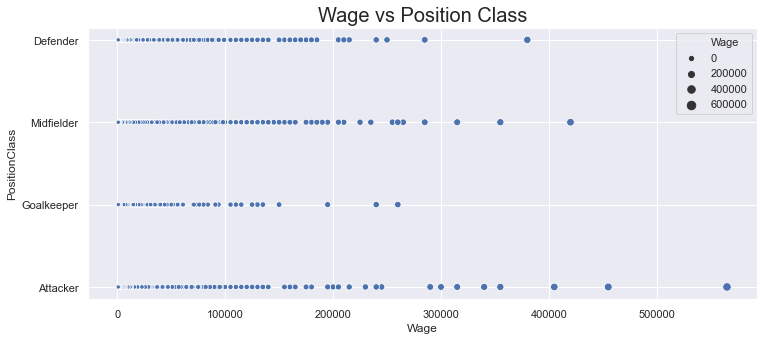

In [160]:
plt.figure(figsize=(12,5))
labels = topwage.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [177]:
df.drop(["Unnamed: 0","Flag","Club","Photo","Club Logo", "ID"],axis=1,inplace=True)
df_germany = df.loc[df['Nationality']=='Germany']
df_germany.describe()


,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1198.000000,1198.000000,1198.000000,1.198000e+03,1198.000000,1198.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,24.338063,66.086811,71.699499,2.529307e+06,9639.398998,1566.782972,1.138912,3.133891,2.279498,19.224268,...,45.676151,56.370711,47.082008,47.620084,45.204184,18.141423,17.766527,17.257741,17.507950,18.174059
std,4.243240,6.638976,5.760017,6.224263e+06,22121.375147,288.120087,0.445469,0.683974,0.734783,11.493932,...,15.327679,13.002086,20.623813,22.215963,22.103233,19.374410,18.286063,17.718027,18.273437,19.745402
min,17.000000,47.000000,57.000000,1.000000e+04,1000.000000,788.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,12.000000,5.000000,8.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,21.000000,62.000000,68.000000,3.500000e+05,1000.000000,1437.000000,1.000000,3.000000,2.000000,9.000000,...,36.000000,49.000000,29.000000,27.000000,22.000000,8.000000,9.000000,8.000000,8.000000,8.000000
50%,24.000000,66.000000,71.000000,6.750000e+05,3000.000000,1606.000000,1.000000,3.000000,2.000000,19.000000,...,47.000000,58.000000,53.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,27.000000,70.000000,75.000000,1.400000e+06,8000.000000,1754.750000,1.000000,3.000000,3.000000,28.000000,...,57.000000,66.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,39.000000,90.000000,92.000000,7.650000e+07,355000.000000,2203.000000,5.000000,5.000000,5.000000,90.000000,...,90.000000,91.000000,88.000000,90.000000,88.000000,90.000000,86.000000,91.000000,87.000000,90.000000


In [200]:
target = "Overall"
predictors = list(df_germany.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
print(target,predictors)

Overall ['Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'PositionClass']


In [237]:
def numColumns(col):
    if type(list(df_germany[col])[0]) == float:
        return col

numberPreds = []

for c in df_germany.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

numberPreds.remove("Loaned From")
numberPreds

['Value',
 'Wage',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [241]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors)
df_germany = df_germany.fillna(0)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df_germany[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(1198, 40) (1198,)


In [226]:
df_germany['Loaned From'].loc[df_germany["Loaned From"].isna() == False]

504        Paris Saint-Germain
620                  Liverpool
1021         Borussia Dortmund
1426                       PSV
3278          SV Werder Bremen
3649               Hannover 96
3771      FC Red Bull Salzburg
4970       Eintracht Frankfurt
5293              Norwich City
5925       Eintracht Frankfurt
6385               SC Freiburg
6547         Borussia Dortmund
7785           1. FSV Mainz 05
7796                Hertha BSC
7881          SV Werder Bremen
8270           SV Darmstadt 98
8337               SC Freiburg
8474       Bayer 04 Leverkusen
9080       TSG 1899 Hoffenheim
9579        1. FC Union Berlin
10039            VfB Stuttgart
10144              FC Augsburg
10325             Hamburger SV
10668       Fortuna Düsseldorf
10692            FC Schalke 04
10840    DSC Arminia Bielefeld
10973          SC Paderborn 07
11244        FC Bayern München
11853          VfL Bochum 1848
12126         SV Werder Bremen
12455              Hannover 96
12459            SV Sandhausen
12555   

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=200,verbose=1)
mlpReg.fit(X_train.values,y_train.values)

Iteration 1, loss = 0.88628687
Iteration 2, loss = 0.51988351
Iteration 3, loss = 0.34868206
Iteration 4, loss = 0.24347768
Iteration 5, loss = 0.20169247
Iteration 6, loss = 0.16860273
Iteration 7, loss = 0.14278769
Iteration 8, loss = 0.13399157
Iteration 9, loss = 0.12177505
Iteration 10, loss = 0.10751252
Iteration 11, loss = 0.09804612
Iteration 12, loss = 0.09058015
Iteration 13, loss = 0.08407795
Iteration 14, loss = 0.07927093
Iteration 15, loss = 0.07513642
Iteration 16, loss = 0.07334922
Iteration 17, loss = 0.07191803
Iteration 18, loss = 0.06873257
Iteration 19, loss = 0.06581159
Iteration 20, loss = 0.06335483
Iteration 21, loss = 0.06190446
Iteration 22, loss = 0.06058628
Iteration 23, loss = 0.05787390
Iteration 24, loss = 0.05536891
Iteration 25, loss = 0.05446667
Iteration 26, loss = 0.05372311
Iteration 27, loss = 0.05173166
Iteration 28, loss = 0.05432843
Iteration 29, loss = 0.04865971
Iteration 30, loss = 0.05463303
Iteration 31, loss = 0.05014746
Iteration 32, los

MLPRegressor(verbose=1)

In [249]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)
print(score)

0.9362371256176497


In [250]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [253]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
print(score_lr)

0.853219823295739
